## Problem: 987. Vertical Order Traversal of a Binary Tree

https://leetcode.com/problems/vertical-order-traversal-of-a-binary-tree/description/

Given the root of a binary tree, calculate the vertical order traversal of the binary tree.

For each node at position (row, col), its left and right children will be at positions (row + 1, col - 1) and (row + 1, col + 1) respectively. The root of the tree is at (0, 0).

The vertical order traversal of a binary tree is a list of top-to-bottom orderings for each column index starting from the leftmost column and ending on the rightmost column. There may be multiple nodes in the same row and same column. In such a case, sort these nodes by their values.

Return the vertical order traversal of the binary tree.

 

Example 1:


Input: root = [3,9,20,null,null,15,7]

Output: [[9],[3,15],[20],[7]]

Explanation:

Column -1: Only node 9 is in this column.

Column 0: Nodes 3 and 15 are in this column in that order from top to bottom.

Column 1: Only node 20 is in this column.

Column 2: Only node 7 is in this column.

Example 2:
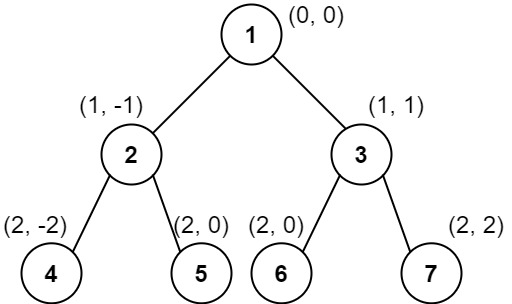

Input: root = [1,2,3,4,5,6,7]

Output: [[4],[2],[1,5,6],[3],[7]]

Explanation:

Column -2: Only node 4 is in this column.

Column -1: Only node 2 is in this column.

Column 0: Nodes 1, 5, and 6 are in this column.
          1 is at the top, so it comes first.
          5 and 6 are at the same position (2, 0), so we order them by their value, 5 before 6.

Column 1: Only node 3 is in this column.

Column 2: Only node 7 is in this column.

Example 3:


Input: root = [1,2,3,4,6,5,7]

Output: [[4],[2],[1,5,6],[3],[7]]

Explanation:

This case is the exact same as example 2, but with nodes 5 and 6 swapped.
Note that the solution remains the same since 5 and 6 are in the same location and should be ordered by their values.
 

Constraints:

The number of nodes in the tree is in the range [1, 1000].
0 <= Node.val <= 1000

In [ ]:
def verticalTraversal(root):
    level = {}
    q = deque([(root,0)])
    while q:
        # Store temporary for sorting the value for same level and same vertical.
        # as per question, for same level if more than one value is there then those should be in sorted order.
        temp = {}
        for _ in range(len(q)):
            item, c = q.popleft()
            if c in temp:
                temp[c].append(item.val)
            else:
                temp[c] = [item.val]
            if item.left:
                q.append((item.left, c-1))
            if item.right:
                q.append((item.right, c+1))
        
        for i in temp.keys():
            # sorting value 
            values = sorted(temp[i])
            if i in level:
                for v in values:
                    level[i].append(v)
            else:
                level[i] = values

    res = []
    for i in sorted(level.keys()):
        values = level[i]
        res.append(values[:])
    return res